In [ ]:
# Importing Library -------------%%%%

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [ ]:
# Authenticating Users ------------%%%%%%
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:



downloaded = drive.CreateFile({'id':'1H3Dpt2nkyFhpap7CuATl_YGi2dXJFS7z'}) # replace the id with id of file you want to access
downloaded.GetContentFile('tv.csv')

downloaded = drive.CreateFile({'id':'1sYMrQB_ViWlhUAkBA_znHSZLxDPHIQBh'}) # replace the id with id of file you want to access
downloaded.GetContentFile('temp_data.csv')

In [ ]:
#imporing capitalbikeshare-tripdata dataset
temp = pd.read_csv("temp_data.csv") 
temp.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,WS50M_RANGE,WS10M_RANGE
0,39.07271,-76.98409,2020,1,1,0.00,3.12,70.76,99.90,8.02,1.35,-2.70,-2.64,7.11,-0.91,2.02,4.67,4.39
1,39.07271,-76.98409,2020,1,2,0.01,4.09,86.33,100.20,9.68,2.23,0.97,0.77,7.90,-1.78,3.05,5.88,1.73
2,39.07271,-76.98409,2020,1,3,6.28,6.55,96.38,99.80,6.49,7.72,7.61,7.59,12.00,5.51,8.17,5.32,2.81
3,39.07271,-76.98409,2020,1,4,6.11,7.00,95.56,99.33,10.09,8.64,8.51,8.33,14.77,4.68,9.20,7.27,5.43
4,39.07271,-76.98409,2020,1,5,0.03,3.03,69.01,100.38,5.19,1.67,-3.04,-3.02,4.63,-0.56,2.01,11.63,8.55


In [ ]:
#imporing capitalbikeshare-tripdata dataset
df = pd.read_csv("tv.csv") 
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,31287.0,1223.0,22.0,8.0,2020.0
1,1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,31271.0,287.0,26.0,8.0,2020.0
2,2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,32014.0,2338.0,7.0,8.0,2020.0
3,3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,31528.0,833.0,7.0,8.0,2020.0
4,4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,31122.0,513.0,18.0,8.0,2020.0


In [ ]:
s1 = df.query('start_station_id == 31100')
s1 = s1.sort_values(by=['DY'])
s1 = pd.DataFrame(s1)
s1 = s1.reset_index()
s1.head()

,index,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,39959869,39959869,366898A27EFA72A6,docked_bike,2020-10-01 09:10:15,31100.0,1646.0,1.0,10.0,2020.0
1,36597133,36597133,23AC78E5F83D0FE3,electric_bike,2020-09-01 17:47:12,31100.0,379.0,1.0,9.0,2020.0
2,37399863,37399863,CF282FF39CC62DB8,electric_bike,2020-09-01 15:10:58,31100.0,1196.0,1.0,9.0,2020.0
3,5837606,5837606,568E56DAF2A642E0,docked_bike,2020-08-01 23:32:38,31100.0,760.0,1.0,8.0,2020.0
4,24130948,24130948,2DCAF57573AB01D4,docked_bike,2020-09-01 13:33:02,31100.0,414.0,1.0,9.0,2020.0


In [ ]:
result = pd.merge(s1, temp, how='left', on=['DY', 'MO','YEAR'])
result


,index,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,WS50M_RANGE,WS10M_RANGE
0,39959869,39959869,366898A27EFA72A6,docked_bike,2020-10-01 09:10:15,31100.0,1646.0,1.0,10.0,2020.0,39.07271,-76.98409,2.51,8.18,68.46,100.16,10.40,17.06,11.04,10.78,22.21,11.81,16.79,6.68,4.02
1,36597133,36597133,23AC78E5F83D0FE3,electric_bike,2020-09-01 17:47:12,31100.0,379.0,1.0,9.0,2020.0,39.07271,-76.98409,2.49,14.35,85.16,100.56,7.80,22.62,19.74,19.71,26.47,18.67,22.34,2.27,1.88
2,37399863,37399863,CF282FF39CC62DB8,electric_bike,2020-09-01 15:10:58,31100.0,1196.0,1.0,9.0,2020.0,39.07271,-76.98409,2.49,14.35,85.16,100.56,7.80,22.62,19.74,19.71,26.47,18.67,22.34,2.27,1.88
3,5837606,5837606,568E56DAF2A642E0,docked_bike,2020-08-01 23:32:38,31100.0,760.0,1.0,8.0,2020.0,39.07271,-76.98409,1.71,15.53,70.06,100.14,9.68,27.89,21.05,20.91,31.55,21.88,26.85,6.75,4.50
4,24130948,24130948,2DCAF57573AB01D4,docked_bike,2020-09-01 13:33:02,31100.0,414.0,1.0,9.0,2020.0,39.07271,-76.98409,2.49,14.35,85.16,100.56,7.80,22.62,19.74,19.71,26.47,18.67,22.34,2.27,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,4862624,4862624,422DA1CA6A01ED60,docked_bike,2020-08-30 11:31:07,31100.0,475.0,30.0,8.0,2020.0,39.07271,-76.98409,0.52,10.61,61.54,99.79,10.16,22.52,14.97,14.82,27.15,17.00,22.62,7.52,4.02
244,41338404,41338404,DE7A5E3ADAA0720D,docked_bike,2020-10-30 18:18:34,31100.0,1149.0,30.0,10.0,2020.0,39.07271,-76.98409,4.60,5.82,83.46,100.21,5.72,9.23,5.96,5.94,11.62,5.90,8.61,4.29,5.01
245,23686230,23686230,A4470CF74932D126,docked_bike,2020-09-30 21:25:06,31100.0,1570.0,30.0,9.0,2020.0,39.07271,-76.98409,7.47,8.23,72.31,99.73,9.32,16.56,11.06,10.94,21.10,11.78,15.97,3.46,3.67
246,21062594,21062594,17DA7848149C7BE3,docked_bike,2020-09-30 18:33:20,31100.0,765.0,30.0,9.0,2020.0,39.07271,-76.98409,7.47,8.23,72.31,99.73,9.32,16.56,11.06,10.94,21.10,11.78,15.97,3.46,3.67


In [ ]:
s10 = df.query('start_station_id == 31233')
s10 = s10.sort_values(by=['DY'])
s10 = pd.DataFrame(s10)
s10 = s10.reset_index()
s10.head()

,index,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,37494555,37494555,2D0664BD2C7F5422,electric_bike,2020-09-01 14:46:22,31233.0,761.0,1.0,9.0,2020.0
1,40652617,40652617,697981EAFF0D7E90,docked_bike,2020-10-01 15:32:56,31233.0,487.0,1.0,10.0,2020.0
2,22152506,22152506,CCAE8ECC7860399C,docked_bike,2020-09-01 22:07:18,31233.0,1736.0,1.0,9.0,2020.0
3,39926205,39926205,6AD712B029974936,docked_bike,2020-10-01 14:49:22,31233.0,1531.0,1.0,10.0,2020.0
4,44176417,44176417,EDAC85D8DC5DEA56,docked_bike,2020-10-01 17:53:20,31233.0,1079.0,1.0,10.0,2020.0


In [ ]:
s6 =s1.groupby(["rideable_type","DY"])
s6

In [ ]:
sa =result.groupby(["DY","MO","PS","T2M_RANGE","T2M_MAX","T2M_MIN","RH2M","rideable_type","WS50M_RANGE","T2MDEW","T2M","QV2M"]).size()
s5 = []
s6 = []
sa = pd.DataFrame(sa,columns=['count'])
modified = sa.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
sb = s1[['DY','MO','time_to_travel']]
modified['docked_b'] = s5
modified['electric_b'] = s6
#modified = pd.merge(modified, sb, how="left", on=["DY", "MO"])
#sb
modified

[0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 4, 0, 2, 0, 3, 0, 0, 4, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 3, 3, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0]
[2, 0, 7, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 4, 1, 0, 0, 2, 3, 0, 1, 0, 5, 3, 0, 1, 0, 2, 2, 0, 6, 0, 1, 3, 0, 3, 2, 1, 2, 1, 0, 3, 4, 0, 1, 0, 9, 1, 2, 2, 5, 0, 3, 1, 0, 3, 5, 1, 0, 1, 0, 2, 0, 3, 5, 0, 4, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 3, 0, 2, 1, 3, 0, 3, 0, 2, 1, 0, 0, 0, 1, 0, 1, 4, 0, 2, 0, 5, 0, 3, 1, 0, 2, 3, 5, 0, 1, 1]


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,WS50M_RANGE,T2MDEW,T2M,QV2M,count,docked_b,electric_b
0,1.0,8.0,100.14,9.68,31.55,21.88,70.06,docked_bike,6.75,21.05,26.85,15.53,2,2,0
1,1.0,8.0,100.14,9.68,31.55,21.88,70.06,electric_bike,6.75,21.05,26.85,15.53,2,0,2
2,1.0,9.0,100.56,7.80,26.47,18.67,85.16,docked_bike,2.27,19.74,22.34,14.35,7,7,0
3,1.0,9.0,100.56,7.80,26.47,18.67,85.16,electric_bike,2.27,19.74,22.34,14.35,2,0,2
4,1.0,10.0,100.16,10.40,22.21,11.81,68.46,docked_bike,6.68,11.04,16.79,8.18,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,30.0,8.0,99.79,10.16,27.15,17.00,61.54,docked_bike,7.52,14.97,22.62,10.61,3,3,0
106,30.0,9.0,99.73,9.32,21.10,11.78,72.31,docked_bike,3.46,11.06,15.97,8.23,5,5,0
107,30.0,9.0,99.73,9.32,21.10,11.78,72.31,electric_bike,3.46,11.06,15.97,8.23,1,0,1
108,30.0,10.0,100.21,5.72,11.62,5.90,83.46,docked_bike,4.29,5.96,8.61,5.82,1,1,0


In [ ]:
 modified.reset_index(inplace=True, drop=True)
modified.sort_values(['DY', 'MO'], ascending=[True, False])


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,WS50M_RANGE,T2MDEW,T2M,QV2M,count,docked_b,electric_b
4,1.0,10.0,100.16,10.40,22.21,11.81,68.46,docked_bike,6.68,11.04,16.79,8.18,1,1,0
2,1.0,9.0,100.56,7.80,26.47,18.67,85.16,docked_bike,2.27,19.74,22.34,14.35,7,7,0
3,1.0,9.0,100.56,7.80,26.47,18.67,85.16,electric_bike,2.27,19.74,22.34,14.35,2,0,2
0,1.0,8.0,100.14,9.68,31.55,21.88,70.06,docked_bike,6.75,21.05,26.85,15.53,2,2,0
1,1.0,8.0,100.14,9.68,31.55,21.88,70.06,electric_bike,6.75,21.05,26.85,15.53,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,30.0,10.0,100.21,5.72,11.62,5.90,83.46,docked_bike,4.29,5.96,8.61,5.82,1,1,0
106,30.0,9.0,99.73,9.32,21.10,11.78,72.31,docked_bike,3.46,11.06,15.97,8.23,5,5,0
107,30.0,9.0,99.73,9.32,21.10,11.78,72.31,electric_bike,3.46,11.06,15.97,8.23,1,0,1
105,30.0,8.0,99.79,10.16,27.15,17.00,61.54,docked_bike,7.52,14.97,22.62,10.61,3,3,0


In [ ]:
df1 = modified[modified['rideable_type'] == 'docked_bike']
df1 = df1.drop(['rideable_type','count', 'electric_b'], axis=1)
df1

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
0,1.0,8.0,100.14,9.68,31.55,21.88,70.06,6.75,21.05,26.85,15.53,2
2,1.0,9.0,100.56,7.80,26.47,18.67,85.16,2.27,19.74,22.34,14.35,7
4,1.0,10.0,100.16,10.40,22.21,11.81,68.46,6.68,11.04,16.79,8.18,1
5,2.0,8.0,100.03,10.09,34.01,23.92,66.16,4.90,21.85,28.65,16.31,1
6,2.0,9.0,100.01,8.21,29.40,21.18,87.59,1.60,23.00,25.20,17.66,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104,29.0,9.0,99.67,11.55,26.35,14.80,88.15,6.01,18.92,20.96,13.77,2
105,30.0,8.0,99.79,10.16,27.15,17.00,61.54,7.52,14.97,22.62,10.61,3
106,30.0,9.0,99.73,9.32,21.10,11.78,72.31,3.46,11.06,15.97,8.23,5
108,30.0,10.0,100.21,5.72,11.62,5.90,83.46,4.29,5.96,8.61,5.82,1


In [ ]:
df2 = modified[modified['rideable_type'] == 'electric_bike']
df2 = df2.drop(['rideable_type','count', 'docked_b'], axis=1)
df2

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,electric_b
1,1.0,8.0,100.14,9.68,31.55,21.88,70.06,6.75,21.05,26.85,15.53,2
3,1.0,9.0,100.56,7.80,26.47,18.67,85.16,2.27,19.74,22.34,14.35,2
7,2.0,9.0,100.01,8.21,29.40,21.18,87.59,1.60,23.00,25.20,17.66,3
10,3.0,8.0,100.50,9.03,31.14,22.11,68.29,4.94,19.64,25.80,14.17,1
12,3.0,9.0,99.79,8.44,30.33,21.89,81.72,5.78,22.68,25.99,17.30,1
15,4.0,8.0,99.84,7.29,29.03,21.74,83.31,10.41,21.43,24.41,16.04,1
16,4.0,9.0,100.14,10.42,29.21,18.79,79.02,4.64,20.80,24.61,15.34,2
19,5.0,8.0,100.52,9.73,29.23,19.50,68.25,4.93,18.65,24.78,13.31,2
21,5.0,9.0,101.03,11.09,25.80,14.71,58.42,7.09,12.04,20.38,8.66,2
24,6.0,8.0,100.63,4.47,25.31,20.84,85.43,5.32,20.81,23.38,15.33,2


In [ ]:
df1['PS'] = df1['PS'] - 100
modified = df1
modified

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
0,1.0,8.0,0.14,9.68,31.55,21.88,70.06,6.75,21.05,26.85,15.53,2
2,1.0,9.0,0.56,7.80,26.47,18.67,85.16,2.27,19.74,22.34,14.35,7
4,1.0,10.0,0.16,10.40,22.21,11.81,68.46,6.68,11.04,16.79,8.18,1
5,2.0,8.0,0.03,10.09,34.01,23.92,66.16,4.90,21.85,28.65,16.31,1
6,2.0,9.0,0.01,8.21,29.40,21.18,87.59,1.60,23.00,25.20,17.66,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104,29.0,9.0,-0.33,11.55,26.35,14.80,88.15,6.01,18.92,20.96,13.77,2
105,30.0,8.0,-0.21,10.16,27.15,17.00,61.54,7.52,14.97,22.62,10.61,3
106,30.0,9.0,-0.27,9.32,21.10,11.78,72.31,3.46,11.06,15.97,8.23,5
108,30.0,10.0,0.21,5.72,11.62,5.90,83.46,4.29,5.96,8.61,5.82,1


In [ ]:
modified.corr()

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
DY,1.000000,-0.037726,-0.084852,0.046371,-0.187189,-0.180929,0.181728,-0.088596,-0.095614,-0.193283,-0.088715,-0.035373
MO,-0.037726,1.000000,0.351309,0.366845,-0.773483,-0.825302,-0.008511,-0.017158,-0.698756,-0.828805,-0.740939,-0.104512
PS,-0.084852,0.351309,1.000000,0.252629,-0.509703,-0.548599,-0.296771,-0.083482,-0.574968,-0.545636,-0.547619,-0.004032
T2M_RANGE,0.046371,0.366845,0.252629,1.000000,-0.092106,-0.520726,-0.587425,0.138569,-0.504186,-0.332847,-0.522479,-0.058006
T2M_MAX,-0.187189,-0.773483,-0.509703,-0.092106,1.000000,0.898056,0.103138,-0.122028,0.851248,0.967323,0.850211,0.088425
T2M_MIN,-0.180929,-0.825302,-0.548599,-0.520726,0.898056,1.000000,0.347864,-0.165782,0.952543,0.976400,0.959714,0.101501
RH2M,0.181728,-0.008511,-0.296771,-0.587425,0.103138,0.347864,1.000000,-0.335193,0.576466,0.234096,0.535904,-0.028261
WS50M_RANGE,-0.088596,-0.017158,-0.083482,0.138569,-0.122028,-0.165782,-0.335193,1.000000,-0.241770,-0.137556,-0.241665,-0.315772
T2MDEW,-0.095614,-0.698756,-0.574968,-0.504186,0.851248,0.952543,0.576466,-0.241770,1.000000,0.928928,0.987786,0.078092
T2M,-0.193283,-0.828805,-0.545636,-0.332847,0.967323,0.976400,0.234096,-0.137556,0.928928,1.000000,0.932988,0.097535


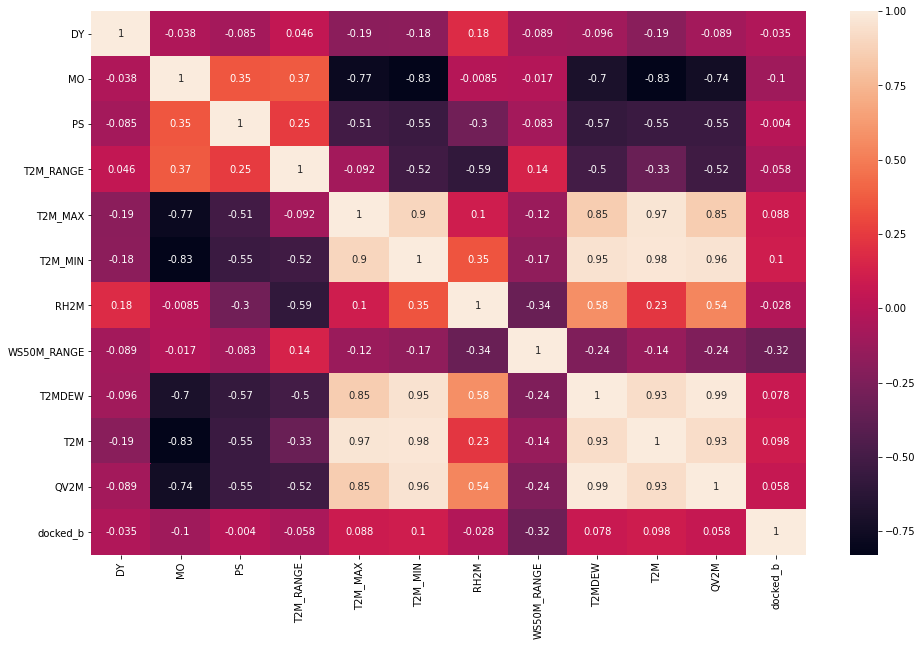

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(modified.corr(), annot=True)
plt.show()

In [ ]:
docked_count = modified['docked_b'].sum()
print (docked_count)
electric_count = df2['electric_b'].sum()
print (electric_count)


169
79


In [ ]:
index = modified.index
number_of_rows = len(index)
number_of_rows

71

In [ ]:
from sklearn.svm import SVC
!pip3 install quandl
!pip3 install sklearn
import quandl, math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

In [ ]:

X = modified.drop(['docked_b'], 1)
y = modified['docked_b']

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.22
Mean Squared Error: 2.0966666666666667
Root Mean Squared Error: 1.4479871085982314


In [ ]:
#X = preprocessing.scale(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [ ]:
clf = LinearRegression()

In [ ]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred = np.ceil(y_pred)
y_pred

array([3., 3., 3., 3., 4., 3., 4., 4., 3., 3., 3., 4., 2., 3., 3.])

In [ ]:
y_test

array([3, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 5, 1, 5])

In [ ]:
#To retrieve the intercept:
print(clf.intercept_)

#For retrieving the slope:
print(clf.coef_)

65.44908755651379
[-3.09569905e-02 -1.00163931e+00 -3.49329666e-03 -1.30518195e+01
  1.27037889e+01 -1.32475466e+01 -4.94013433e-01 -4.26014608e-01
  2.93798144e+00 -1.80998971e+00 -1.00983561e+00]


In [ ]:
from sklearn.metrics import mean_squared_log_error
msleDT=mean_squared_log_error(y_pred,y_test)
rmsleLR=np.sqrt(msleDT)
print('RMLSE for the data:',rmsleLR)

RMLSE for the data: 0.6128343141626714


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  rmsleRF=np.sqrt(mse_reg)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
LinearRegression_max_e = np.max(ls)
LinearRegression_e = np.mean(ls)
mean_mse_LinearRegression_e = np.mean(mse_reg)
LinearRegression_max_e

58.11262097134578

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-3.3157894736842106


In [ ]:
from sklearn.metrics import mean_squared_log_error
msleDT=mean_squared_log_error(y_pred,y_test)
rmsleDT=np.sqrt(msleDT)
print('RMLSE for the data:',rmsleDT)

RMLSE for the data: 0.868522374017886


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = DecisionTreeRegressor(random_state=0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Decision_tree_max_e = np.max(ls)
Decision_tree_e = np.mean(ls)
mean_mse_Decision_tree_e = np.mean(mse_reg)
Decision_tree_max_e

0.868522374017886

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-1.374013157894737


In [ ]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleRF=np.sqrt(msle)
print('RMLSE for the data:',rmsleRF)

RMLSE for the data: 0.7178275276344859


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Random_forest_max_e = np.max(ls)
Random_regression_e = np.mean(ls)
mean_mse_forest_e = np.mean(mse_reg)
Random_forest_max_e

0.7353763183259591

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
X = modified.drop(['docked_b'], 1)
y = modified['docked_b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
confidence = abc.score(X_test, y_test)
print(confidence)


0.2727272727272727


In [ ]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleADB=np.sqrt(msle)
print('RMLSE for the data:',rmsleADB)

RMLSE for the data: 0.8064132218581502


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['docked_b'], 1))
  y_train = np.array(x['docked_b'])
  X_test = np.array(y.drop(['docked_b'], 1))
  y_test = np.array(y['docked_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = AdaBoostClassifier(random_state=0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
AdaBoostClassifier_max_e = np.max(ls)
AdaBoostClassifier_e = np.mean(ls)
mean_mse_AdaBoostClassifier_e = np.mean(mse_reg)
AdaBoostClassifier_max_e

0.8204432279236396

-------------------Electric Bike--------------------

In [ ]:
modified = df2

In [ ]:
X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

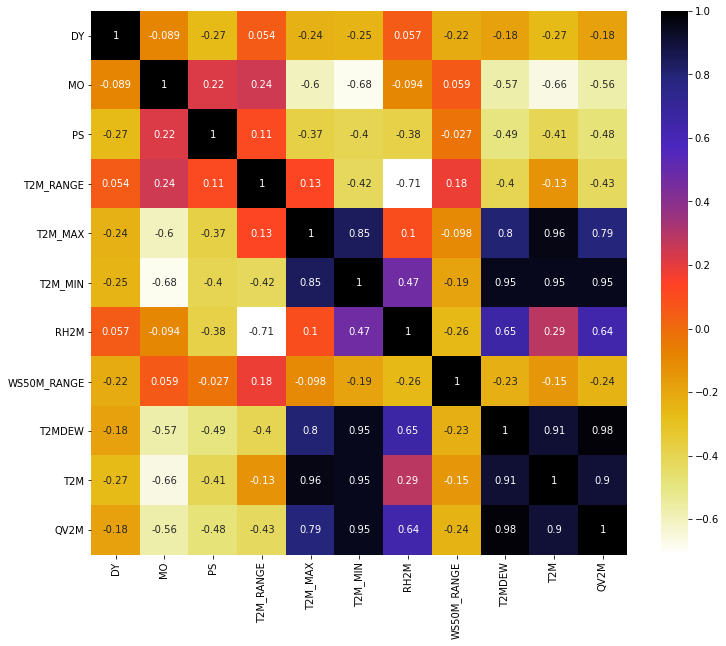

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
#corr_features = correlation(X, 0.7)
#len(set(corr_features))

In [ ]:
#X.drop(corr_features,axis=1)

In [ ]:
#corr_features

In [ ]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [ ]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


-2.0547911528220193


In [ ]:
U=clf.predict(X_test)
U

array([1.69859187, 1.9516142 , 2.78054282, 2.16403739, 3.47485178,
       1.41517675, 2.21852008, 1.62672601])

In [ ]:
y_test

91    3
77    2
15    1
34    3
67    1
86    2
24    2
1     2
Name: electric_b, dtype: int64

In [ ]:
clf.score(X_test,y_test)

-2.0547911528220193

In [ ]:
from sklearn.model_selection import KFold # import KFold
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
#y = np.array([1, 2, 3, 4]) # Create another array
#X = modified.drop(['PS','electric_b','count'], 1)
#y = modified['electric_b']
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [ ]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
# Perform 6-fold cross validation
cv_4_results = cross_val_score(clf, X, y, cv=25,)
cv_4_results = abs(cv_4_results)
print ('Cross-validated scores:', abs(cv_4_results))
#print('mean score', mean(cv_4_results))


Cross-validated scores: [0.         0.41483953 0.         0.         0.         0.82342407
 0.73675865 2.98765234 0.         0.80478005 5.9396819  3.23418595
 0.         0.77514095        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

In [ ]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [ ]:

X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

In [ ]:
index = modified.index
number_of_rows = len(index)
number_of_rows

39

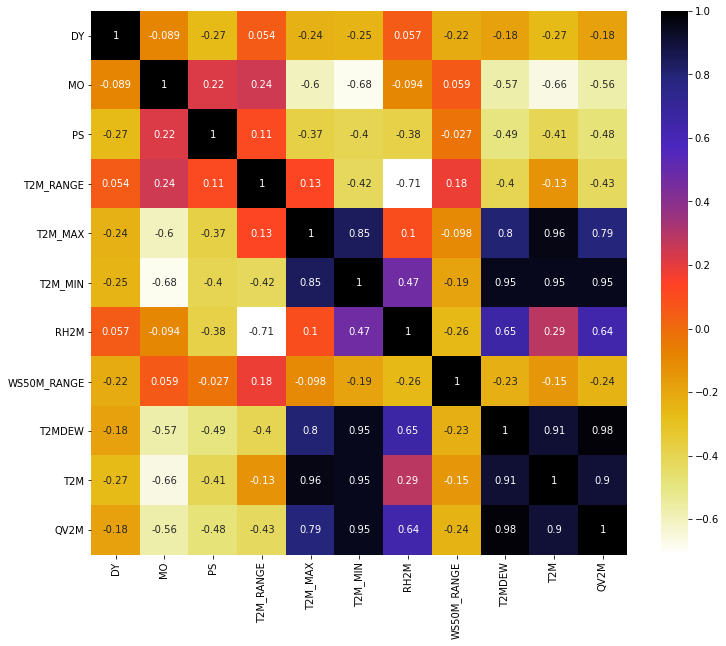

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:

X = np.array(X)
y = np.array(y)

In [ ]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [ ]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleLR1=np.sqrt(msle)
print('RMLSE for the data:',rmsleLR1)

RMLSE for the data: 0.3556429624425124


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  rmsleRF=np.sqrt(mse_reg)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
LinearRegression_max_e1 = np.max(ls)
LinearRegression_e1 = np.mean(ls)
mean_mse_LinearRegression_e1 = np.mean(mse_reg)
LinearRegression_max_e1

22.452921680364295

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-6.807692307692308


In [ ]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleDT1=np.sqrt(msle)
print('RMLSE for the data:',rmsleDT1)

RMLSE for the data: 0.6285958325231996


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = DecisionTreeRegressor(random_state=0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Decision_tree_max_e1 = np.max(ls)
Decision_tree_e1 = np.mean(ls)
mean_mse_Decision_tree_e1 = np.mean(mse_reg)
Decision_tree_max_e1

0.6285958325231996

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-1.6068269230769228


In [ ]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleRF1=np.sqrt(msle)
print('RMLSE for the data:',rmsleRF1)

RMLSE for the data: 0.4261213537777778


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = RandomForestRegressor(n_estimators=10, random_state=20)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
Random_forest_max_e1 = np.max(ls)
Random_regression_e1 = np.mean(ls)
mean_mse_forest_e1 = np.mean(mse_reg)
Random_forest_max_e1

0.4484658580436534

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
X = modified.drop(['electric_b'], 1)
y = modified['electric_b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
confidence = abc.score(X_test, y_test)
print(confidence)


0.3333333333333333


In [ ]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleADB1=np.sqrt(msle)
print('RMLSE for the data:',rmsleADB1)

RMLSE for the data: 0.34171670026025125


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
ls = []
mse_list=[]
num_test = (number_of_rows*20)//100
for i in range(0,number_of_rows):
  u = (i)%number_of_rows
  v = (num_test+i)%number_of_rows
  if v >= num_test:
    x = modified[u:v]
    y = modified[v:]
    z = modified[:u]
    y = y.append(z)
  else:
    x = modified[v:u]
    y = modified[u:]
    z = modified[:v]
    y = y.append(z)
  y = pd.DataFrame(y)
  x = pd.DataFrame(x)
  X_train = np.array(x.drop(['electric_b'], 1))
  y_train = np.array(x['electric_b'])
  X_test = np.array(y.drop(['electric_b'], 1))
  y_test = np.array(y['electric_b'])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  regressor = AdaBoostClassifier(random_state=0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  mse_reg = mean_squared_error(y_test, y_pred)
  msleDT=mean_squared_log_error(y_pred,y_test)
  rmsleRF=np.sqrt(msleDT)
  ls.append(rmsleRF)
  mse_list.append(mse_reg)
AdaBoostClassifier_max_e1 = np.max(ls)
AdaBoostClassifier_e1 = np.mean(ls)
mean_mse_AdaBoostClassifier_e1 = np.mean(mse_reg)
AdaBoostClassifier_max_e1

0.5557509920195697

In [ ]:
import pandas as pd

cars = {'type': ['Linear Regression', 'Decision Tree','Random Forest','ADA Boost'],
        'RMSLE(Docked Bike)': [rmsleLR,rmsleDT,rmsleRF,rmsleADB],
        'RMSLE(Electric Bike]' : [rmsleLR1,rmsleDT1,rmsleRF1,rmsleADB1]
        }

df = pd.DataFrame(cars, columns = ['type', 'RMSLE(Docked Bike)','RMSLE(Electric Bike]'])
df

,type,RMSLE(Docked Bike),RMSLE(Electric Bike]
0,Linear Regression,0.612834,0.355643
1,Decision Tree,0.868522,0.628596
2,Random Forest,0.403411,0.426121
3,ADA Boost,0.806413,0.341717


In [ ]:
# after cross validation
import pandas as pd

cars = {'type': ['Linear Regression', 'Decision Tree','Random Forest','ADA Boost'],
        'RMSLE(Docked Bike)': [LinearRegression_e,Decision_tree_e,Random_regression_e,AdaBoostClassifier_e],
        'RMSLE(Docked Bike)(Max)': [LinearRegression_max_e,Decision_tree_max_e,Random_forest_max_e,AdaBoostClassifier_max_e],
        'RMSLE(Electric Bike]' : [LinearRegression_e1,Decision_tree_e1,Random_regression_e1,AdaBoostClassifier_e1],
        'RMSLE(Electric Bike](Max)' : [LinearRegression_max_e1,Decision_tree_max_e1,Random_forest_max_e1,AdaBoostClassifier_max_e1],
        'Mean MSE' : [mean_mse_LinearRegression_e1,mean_mse_Decision_tree_e1,mean_mse_forest_e1,mean_mse_AdaBoostClassifier_e1]
        }

df = pd.DataFrame(cars, columns = ['type', 'RMSLE(Docked Bike)','RMSLE(Docked Bike)(Max)','RMSLE(Electric Bike]','RMSLE(Electric Bike](Max)','Mean MSE'])
df

,type,RMSLE(Docked Bike),RMSLE(Docked Bike)(Max),RMSLE(Electric Bike],RMSLE(Electric Bike](Max),Mean MSE
0,Linear Regression,11.336400,58.112621,6.884665,22.452922,1.638541
1,Decision Tree,0.644130,0.868522,0.401364,0.628596,4.142857
2,Random Forest,0.532953,0.735376,0.335150,0.448466,1.582857
3,ADA Boost,0.609472,0.820443,0.396742,0.555751,1.285714
